In [99]:
import numpy as np
import math

In [100]:
theta = np.array([[0 ,1 ,1 ,0 ,1 ,0 ,0 ,0],[1, 0, 0, 1, 0, 1, 0, 0],[1, 0, 0, 1, 0, 0, 1, 0],[0, 1, 1, 0, 0, 0, 0, 1],[1, 0, 0, 0, 0, 1, 1, 0],
                 [0, 1, 0, 0, 1, 0, 0, 1],[0, 0, 1, 0, 1, 0, 0, 1],[0, 0, 0, 1, 0, 1, 1, 0]])

In [101]:
def sum_ising_prob(state_vec,theta):
    return 1/2*(np.matmul(state_vec,np.matmul(theta,state_vec)))

In [102]:
def current_state(state_vec,theta):
    #per afegir els 22 casos totals es molt facil/ sumar i veure si es positiva o negativa la suma
    mu = abs(sum(state_vec))
    k = sum_ising_prob(state_vec,theta)
    if mu == 8:
        return 0
    elif mu == 6:
        return 1
    elif mu == 4:
        if k == 4:
            return 2
        else:
            distinc_vec = np.matmul(theta,state_vec)
            if -1 in distinc_vec:
                if np.count_nonzero(distinc_vec+3) != 6:
                    return 3
                return 4
            else:
                return 4
    elif mu == 2:
        if k == 2:
            return 5
        elif k == -2:
            return 6
        else:
            return 7
    else:
        if k == 0:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 8
            else:
                return 9
        elif k == 4:
            return 10
        elif k == -4:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 11
            else:
                return 12
        else:
            return 13
            

# Brute force probabilities

In [103]:
def prob_brute_force(theta,J):
    states = np.zeros(14)
    for i in range(256):
        vec = np.array([int(x) for x in list('{:08b}'.format(i))])
        aux_vec = 1 - vec;
        vec = vec*-1;
        state_vec = vec + aux_vec;
        #states[current_state(state_vec,theta)]+=1 #guardes quants cops entres a cada estat
        k = sum_ising_prob(state_vec,theta)
        states[current_state(state_vec,theta)]+= np.exp(k*J)
        states/=sum(states)
    return states

In [106]:
prob_brute_force(theta,0.2)

array([9.16827304e-01, 7.97933378e-02, 3.29728970e-03, 5.18773731e-05,
       2.46210952e-12, 3.01817045e-05, 1.75668205e-12, 2.96598080e-12,
       4.92369609e-12, 5.73313204e-13, 9.86942027e-09, 4.09455267e-14,
       9.94277917e-24, 2.86241121e-37])

In [247]:
def gibbs_sampling():
    T = np.array([[0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,0,1,1,1,0,0,0,0,0,0,0,0,0],
                  [0,1,0,0,0,1,1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,1,1,1,0,0,0,0,0,0],
                  [0,1,0,0,0,0,1,0,0,0,0,0,0,0],
                  [0,0,1,1,0,0,0,0,1,1,1,1,0,0],
                  [0,0,1,1,1,0,0,0,0,1,0,1,1,0],
                  [0,0,0,1,0,0,0,0,1,0,0,1,0,1],
                  [0,0,0,0,0,1,0,1,0,0,0,0,0,0],
                  [0,0,0,0,0,1,1,0,0,0,0,0,0,0],
                  [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,1,1,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0,0,0,0,0]])

In [ ]:
#Tij = Cij/8 sigma( J (k(j) - k(i))

In [6]:
x = np.zeros(22)
x[3] = 1
x

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [8]:
THETA = np.array([[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
                  [0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0],

                  [0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0],
                  [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0],
                  [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
                  [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                  
                  [0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0],
                  [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0],
                  
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],

                 ])

In [21]:
def k(i):
    #where M is the weight mateix
    x = np.zeros(22)
    x[0] = 1
    return np.matmul(M,x)
    #return 1/2*(np.matmul(np.transpose(x),np.matmul(M,x)))

In [22]:
k(2)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [4]:
C = np.array([[0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [1,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,2,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,2,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,2,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,2,1,0,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0],
              [0,0,1,1,1,0,0,0,0,2,0,2,1,0,0,0,0,0,0,0,0,0],
              [0,0,0,3,0,0,0,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0],

              [0,0,0,0,0,3,0,1,0,0,0,0,0,0,1,0,3,0,0,0,0,0],
              [0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0],
              [0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0],
              [0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0],
              [0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,0,0,0,0,0,0,0],

              [0,0,0,0,0,0,0,0,1,0,0,3,0,1,0,0,0,0,3,0,0,0],
              [0,0,0,0,0,0,0,0,0,2,0,2,1,0,0,0,0,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,2,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,2,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,2,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,2,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,1],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0],

             ])

In [6]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [24]:
#important que a la diagonal hem de posar 1-p (i.e probabilitat de quedarte en el mateix node)
def transition_matrix(J,C):
    state_ks = [12*J,6*J,4*J,0,0,2*J,-2*J,-6*J,4*J,0,4*J,-4*J,-4*J,-12*J,-6*J,-2*J,2*J,0,0,4*J,6*J,12*J]
    T = np.zeros((22,22))

    for i, k_int_state in enumerate(state_ks):
        for j, k_next_state in enumerate(state_ks):
            T[i,j] = (C[i,j]/8)*sigmoid(state_ks[j] - state_ks[i]) #k estat final menys inicial
    return T

In [25]:
transition_matrix(1,C)

array([[0.00000000e+00, 2.47262316e-03, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.24690922e-01, 0.00000000e+00, 4.47010958e-02, 9.27233684e-04,
        3.09077895e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.20199269e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.96014610e-02, 6.18155789e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00

In [60]:
def k(x):
    return 1/2*(np.matmul(x,np.matmul(THETA,x)))

In [67]:
def Gibbs(J,num_iter):
    #empty transition matrix
    T = np.zeros((22,22))
    
    #initialize random state of the cube
    vec = np.random.randint(2, size=10)
    aux_vec = 1 - vec
    vec = vec*-1
    state_vec = vec + aux_vec
    
    for i in range(num_iter):
        new_state = state_vec
        q = np.random.randint(8) #generate a random number between 0 and 7
        new_state = new_state[q]*-1
        p = 1/8*sigmoid(J*(k(new_state)-k(state_vec)))
        
        if np.random.binomial(1, p, size=None):
            T[current_state(state_vec)][current_state(new_state)] += 1
            state_vec = new_state
        
        else:
            T[current_state(state_vec)][current_state(state_vec)] += 1
        return T/num_iter

In [ ]:
def mean_field(J,num_iter):
    #initialize random state of the cube
    vec = np.random.randint(2, size=10)
    aux_vec = 1 - vec
    vec = vec*-1
    state_vec = vec + aux_vec
    
    for i in range(num_iter):
        for j in range(8):
            state_vec[]
        print(state_vec)

In [127]:
#per mu==0 k==0
v1 = np.array([1, 1, 1, -1, -1, 1, -1, -1])*-1
v2 = np.array([-1, 1, -1, 1, 1, 1, -1, -1])*-1
v3 = np.array([1, -1, -1, -1, 1, 1, -1, 1])*-1

b1 = np.array([1, 1, 1, -1, 1, -1, -1, -1])*-1
b2 = np.array([1, 1, -1, 1, -1, 1, -1, -1])*-1
b3 = np.array([1, 1, 1, -1, 1, -1, -1, -1])*-1
#per mu==0 k==-4
w1 = np.array([1, 1, 1, -1, -1, -1, -1, 1])*-1
w2 = np.array([-1, 1, -1, 1, -1, 1, 1, -1])*-1
w3 = np.array([-1, -1, 1, 1, -1, 1, 1, -1])*-1

a1 = np.array([1, -1, 1, -1, -1, 1, -1, 1])*-1
a2 = np.array([1, -1, -1, 1, 1, -1, -1, 1])*-1
a3 = np.array([-1, 1, -1, 1, 1, -1, 1, -1])*-1

#per mu==4 k==0
q1 = np.array([1,-1, -1, 1, -1, -1, -1, -1])*-1
q2 = np.array([-1, 1, -1, -1, -1, -1, -1, 1])*-1
q3 = np.array([-1, -1, 1, -1, -1, 1, -1, -1])*-1

z1 = np.array([1, -1, -1, -1, -1, -1, -1, 1])*-1
z2 = np.array([-1, 1, -1, -1, -1, -1, 1, -1])*-1
z3 = np.array([-1, -1, 1, -1, -1, 1, -1, -1])*-1

In [128]:
print(np.matmul(theta,q1))
print(np.matmul(theta,q2))
print(np.matmul(theta,q3))

[ 3 -1 -1  3  1  3  3  1]
[ 1  3  3 -1  3 -1  1  3]
[1 1 3 1 1 3 1 1]


In [129]:
print(np.matmul(theta,z1))
print(np.matmul(theta,z2))
print(np.matmul(theta,z3))

[3 1 1 1 1 1 1 3]
[1 3 1 1 1 1 3 1]
[1 1 3 1 1 3 1 1]


# Clean algorithms

In [1]:
import numpy as np
import math
import numpy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
theta = np.array([[0 ,1 ,1 ,0 ,1 ,0 ,0 ,0],[1, 0, 0, 1, 0, 1, 0, 0],[1, 0, 0, 1, 0, 0, 1, 0],[0, 1, 1, 0, 0, 0, 0, 1],[1, 0, 0, 0, 0, 1, 1, 0],
                 [0, 1, 0, 0, 1, 0, 0, 1],[0, 0, 1, 0, 1, 0, 0, 1],[0, 0, 0, 1, 0, 1, 1, 0]])

### Brute force

In [3]:
def ising_prob(state_vec,theta):
    return 1/2*(np.matmul(state_vec,np.matmul(theta,state_vec)))

In [4]:
def current_state_14(state_vec,theta):
    #per afegir els 22 casos totals es molt facil/ sumar i veure si es positiva o negativa la suma
    mu = abs(sum(state_vec))
    k = ising_prob(state_vec,theta)
    if mu == 8:
        return 0
    elif mu == 6:
        return 1
    elif mu == 4:
        if k == 4:
            return 2
        else:
            distinc_vec = np.matmul(theta,state_vec)
            if -1 in distinc_vec:
                if np.count_nonzero(distinc_vec+3) != 6:
                    return 3
                return 4
            else:
                return 4
    elif mu == 2:
        if k == 2:
            return 5
        elif k == -2:
            return 6
        else:
            return 7
    else:
        if k == 0:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 8
            else:
                return 9
        elif k == 4:
            return 10
        elif k == -4:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 11
            else:
                return 12
        else:
            return 13
            

In [5]:
def prob_brute_force(theta,J):
    states = np.zeros(14)
    for i in range(256):
        vec = np.array([int(x) for x in list('{:08b}'.format(i))])
        aux_vec = 1 - vec;
        vec = vec*-1;
        state_vec = vec + aux_vec;
        #states[current_state_14(state_vec,theta)]+=1 #guardes quants cops entres a cada estat
        k = ising_prob(state_vec,theta)
        states[current_state_14(state_vec,theta)]+= np.exp(k*J)
        states/=sum(states)
    return states

In [24]:
prob_brute_force(theta,1)

array([9.99993856e-01, 6.14413771e-06, 3.68906505e-11, 1.50262519e-17,
       8.59720796e-37, 1.32331637e-17, 2.32499047e-37, 8.52413897e-39,
       1.71944155e-36, 4.80354469e-37, 1.19140416e-27, 2.64158558e-39,
       2.97626320e-57, 5.91582535e-82])

### Transition matrix

In [6]:
C = np.array([[0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [1,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,2,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,2,0,0,0,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,2,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,2,1,0,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0],
              [0,0,1,1,1,0,0,0,0,2,0,2,1,0,0,0,0,0,0,0,0,0],
              [0,0,0,3,0,0,0,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0],

              [0,0,0,0,0,3,0,1,0,0,0,0,0,0,1,0,3,0,0,0,0,0],
              [0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0],
              [0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0],
              [0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,2,1,0,0,0,0,0],
              [0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,4,0,0,0,0,0,0,4,0,0,0,0,0,0,0],

              [0,0,0,0,0,0,0,0,1,0,0,3,0,1,0,0,0,0,3,0,0,0],
              [0,0,0,0,0,0,0,0,0,2,0,2,1,0,0,0,0,1,1,1,0,0],
              [0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,1,2,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,2,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,2,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,2,0],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,1],
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0],

             ])

In [7]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [8]:
#important que a la diagonal hem de posar 1-p (i.e probabilitat de quedarte en el mateix node)
def transition_matrix(J,C):
    state_ks = [12*J,6*J,4*J,0,0,2*J,-2*J,-6*J,4*J,0,4*J,-4*J,-4*J,-12*J,-6*J,-2*J,2*J,0,0,4*J,6*J,12*J]
    T = np.zeros((22,22))

    for i, k_int_state in enumerate(state_ks):
        for j, k_next_state in enumerate(state_ks):
            T[i,j] = (C[i,j]/8)*sigmoid(state_ks[j] - state_ks[i]) #k estat final menys inicial
            
    np.fill_diagonal(T, [1-sum(row) for row in T])
    
    return T

In [28]:
T = transition_matrix(1,C)

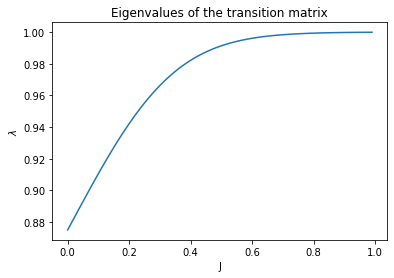

In [17]:
#lambda plots
lambdas = []
J = [i for i in np.arange(0,1,0.01)]
for j in J:
    T = transition_matrix(j,C)
    eigenValues, eigenVectors = linalg.eig(T)
    idx = eigenValues.argsort()[::-1] #l'ultim que se'n va a 0 és el més gordo
    eigenValues = eigenValues[idx] 
    lambdas.append(eigenValues[1])
plt.plot(J,lambdas)
plt.xlabel('J')
plt.ylabel('$\lambda$')
  
# giving a title to my graph
plt.title('Eigenvalues of the transition matrix')
  
# function to show the plot
plt.show()

### Algorithms

In [9]:
def ising_prob(state_vec,theta):
    return 1/2*(np.matmul(state_vec,np.matmul(theta,state_vec)))

In [10]:
def current_state(state_vec,theta):
    #per afegir els 22 casos totals es molt facil/ sumar i veure si es positiva o negativa la suma
    mu = abs(sum(state_vec))
    k = ising_prob(state_vec,theta)
    if mu == 8:
        if sum(state_vec)<0:
            return 21
        return 0
    elif mu == 6:
        if sum(state_vec)<0:
            return 20
        return 1
    elif mu == 4:
        if k == 4:
            if sum(state_vec)<0:
                return 19
            return 2
        else:
            distinc_vec = np.matmul(theta,state_vec)
            if -1 in distinc_vec:
                if np.count_nonzero(distinc_vec+3) != 6:
                    if sum(state_vec)<0:
                        return 18
                    return 3
                if sum(state_vec)<0:
                    return 17
                return 4
            else:
                if sum(state_vec)<0:
                    return 17
                return 4
    elif mu == 2:
        if k == 2:
            if sum(state_vec)<0:
                return 16
            return 5
        elif k == -2:
            if sum(state_vec)<0:
                return 15
            return 6
        else:
            if sum(state_vec)<0:
                return 14
            return 7
    else:
        if k == 0:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 8
            else:
                return 9
        elif k == 4:
            return 10
        elif k == -4:
            distinc_vec = np.matmul(theta,state_vec)
            if 3 in distinc_vec:
                return 11
            else:
                return 12
        else:
            return 13
            

In [11]:
def Gibbs(J,num_iter):
    #empty transition matrix
    T = np.zeros(22)
    
    #initialize random state of the cube
    vec = np.random.randint(2, size=8)
    aux_vec = 1 - vec
    vec = vec*-1
    state_vec = vec + aux_vec
    
    burn_in = 0
    for i in range(num_iter):
        new_state = np.copy(state_vec)
        q = np.random.randint(8) #generate a random number between 0 and 7
        new_state[q] = new_state[q]*-1
        p = sigmoid(J*(ising_prob(new_state,theta)-ising_prob(state_vec,theta)))
        
        #burn in
        if i < 0.2*num_iter and i < 300:
            if np.random.binomial(1, p, size=None):
                state_vec = new_state
                burn_in += 1
            continue
            
        if np.random.binomial(1, p, size=None):
            T[current_state(new_state,theta)] += 1
            state_vec = new_state
        
        else:
            T[current_state(state_vec,theta)] += 1
    return T/(num_iter-burn_in)

In [33]:
Gibbs(0.2,100000) #sembla ser que ja convergeix

array([0.03305793, 0.07716188, 0.07994592, 0.03371889, 0.01341946,
       0.10599369, 0.04987231, 0.00759101, 0.02523659, 0.07422763,
       0.03912673, 0.03278754, 0.0086926 , 0.00068099, 0.00713034,
       0.04969205, 0.11102098, 0.01208753, 0.03606229, 0.08194883,
       0.08311051, 0.03588203])

In [12]:
#per poder fer comprovacions
def Z(J):
    return 2*np.exp(12*J) + 16*np.exp(6*J) + 30*np.exp(4*J) + 48*np.exp(2*J) + 48*np.exp(-2*J) + 30*np.exp(-4*J) + 16*np.exp(-6*J) + 2*np.exp(-12*J) + 64

In [13]:
def comprovar(J):
    print(2*np.exp(12*J)/Z(J))
    print(16*np.exp(6*J)/Z(J))
    print(24*np.exp(4*J)/Z(J))
    print(24/Z(J))
    print(8/Z(J))

In [93]:
comprovar(1)

0.9744974632327609
0.019324301665152404
0.00392288975880472
7.185023222258079e-05
2.3950077407526928e-05


### Mean field

In [14]:
def mean_field(J,num_iter):
    #initialize random state of the cube
    vec = np.random.rand(8)

    for i in range(num_iter):
        for q in range(8):
            neighbours = theta[q].astype(dtype=bool)
            vec[q] = sigmoid(2*J*sum(2*vec[neighbours]-1))
    return vec

In [13]:
mean_field(0.2,5000)

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [10]:
l = []
for j in np.arange(0,1,0.1):
    l.append(mean_field(j,5000))

In [11]:
l

[array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 array([0.82928483, 0.82928483, 0.82928483, 0.82928483, 0.82928483,
        0.82928483, 0.82928483, 0.82928483]),
 array([0.92927982, 0.92927982, 0.92927982, 0.92927982, 0.92927982,
        0.92927982, 0.92927982, 0.92927982]),
 array([0.96635879, 0.96635879, 0.96635879, 0.96635879, 0.96635879,
        0.96635879, 0.96635879, 0.96635879]),
 array([0.01700381, 0.01700381, 0.01700381, 0.01700381, 0.01700381,
        0.01700381, 0.01700381, 0.01700381]),
 array([0.99111729, 0.99111729, 0.99111729, 0.99111729, 0.99111729,
        0.99111729, 0.99111729, 0.99111729]),
 array([0.00473086, 0.00473086, 0.00473086, 0.00473086, 0.00473086,
        0.00473086, 0.00473086, 0.00473086])]

In [15]:
from scipy.optimize import fsolve
import numpy as np
l = []
for j in np.arange(0,1,0.01):
    q = lambda q: sigmoid(6*j*(2*q-1)) - q
    l.append(fsolve(q,1))

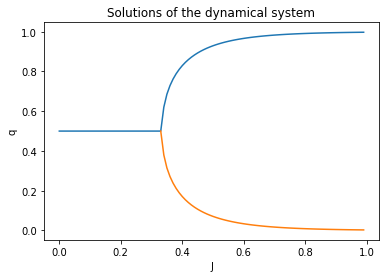

In [16]:
plt.plot(np.arange(0,1,0.01),l)
plt.plot(np.arange(0.33,1,0.01),1-np.array(l[33:]))
plt.xlabel('J')
plt.ylabel('q')
  
# giving a title to my graph
plt.title('Solutions of the dynamical system')
  
# function to show the plot
plt.show()